In [1]:
"""
!pip install soyspacing
!pip install eunjeon

rsc 는 카카오톡에서 대화 내보내기를 통해 내보내진 텍스트 파일 경로를 입력하시면됩니다.
soyspace model은 필요하시면 보내드리겠습니다.
stop_word 도 필요하시면 보내드리겠습니다.
폰트 경로 정도는 직접 설정하기~
"""

'\n!pip install soyspacing\n!pip install eunjeon\n\nrsc 는 카카오톡에서 대화 내보내기를 통해 내보내진 텍스트 파일 경로를 입력하시면됩니다.\nsoyspace model은 필요하시면 보내드리겠습니다.\nstop_word 도 필요하시면 보내드리겠습니다.\n폰트 경로 정도는 직접 설정하기~\n'

In [73]:
def kakao_preprocess(rsc, user):
    
    with open(rsc, encoding='utf-8') as f:
        conv = f.readlines()

    del conv[0:2]

    date_pat = re.compile(r"[0-9]{4}년 1?[0-9]월 [1-3]?[0-9]일 오[후전] [0-9]{1,2}:[0-9]{1,2}")

    talks = []
    for talk in conv:
        talk = re.sub(date_pat, '', talk)
        talk = re.sub('\n', '', talk)
        talk = re.sub(',', '', talk)
        if talk == '':
            pass
        elif user + ' : ' in talk:
            talks.append(talk)

    re_user = ' ' + user + ' : '
    user_raw = []
    for talk in talks:
        raw_talk = re.sub(re_user, '', talk)
        user_raw.append(raw_talk)

    return user_raw

def kakao_word_cnt(rsc, word, user):
    cnt = 0
    talk_list = kakao_preprocess(rsc, user)
    for talk in talk_list:
        if word in talk:
            cnt += 1
    
    print(user + '는 상대방에게 ' + word + '을(를) {0}번 외쳤습니다!'.format(cnt))


def delete_stopwords(norm_content, stop_words, test=False):
    mecab = Mecab()
    noun_content = []
    for x in norm_content:
        noun_content.append(mecab.nouns(x))
    
    ### 추출된 명사들을 묶어 merge_content 에 담는다
    merge_content = []
    for noun in noun_content:
        txt = ' '.join(noun)
        merge_content.append(txt)
    
    ### 불용어 리스트에 없는 단어들만 추가, 명사들로 이뤄진 리스트들
    texts = [[word for word in document.split() if word not in stop_words]
            for document in merge_content]
    if test == True:
        return texts[0]
    return texts

def del_one(word_list):
    res = []
    for word in word_list:
        if len(word) > 1:
            res.append(word)
        else:
            continue
    return res

def kakao_word_cloud(rsc, user, space_model, stop_word):
    user_raw = kakao_preprocess(rsc, user)
    
    if space_model == None:
        spaced_talk = raw_talk
    else:
        # 띄어쓰기 자동화
        model = CountSpace()
        model.load_model(space_model, json_format=False)

        space_corrected_talk = []
        for talk in user_raw:
            # 띄어쓰기 시작
            corrected = model.correct(talk)
            space_corrected_talk.append(corrected)

        spaced_talk = []
        for talk, tag in space_corrected_talk:
            if type(talk) == str:
                spaced_talk.append(talk)
            else:
                continue

    # Lemmatize
    # 불용어 제거
    file = open(stop_word,'r', encoding = 'utf8')
    lines = file.readlines()
    file.close()
    stop_words = lines[0].split()

    lemmas = delete_stopwords(spaced_talk, stop_words)
    lemmas = sum(lemmas, [])
    lemmas = del_one(lemmas)

    #내용어 리스트 생성
    word_freq_Dict = {}
    for lemma in lemmas:
        if lemma in word_freq_Dict:
            word_freq_Dict[lemma] += 1
        else:
            word_freq_Dict[lemma] = 1
    
    # WordCloud
    wordcloud = WordCloud(r"C:\Windows\Fonts\210 수퍼사이즈Black.ttf",
    width = 1000,
    height = 1000,
    background_color="white",
    prefer_horizontal = 0.9999,
    min_font_size = 10)
    wordcloud = wordcloud.generate_from_frequencies(word_freq_Dict)

    #이미지 사이즈
    fig = plt.figure(figsize=(12,12))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os, re
from eunjeon import Mecab
from soyspacing.countbase import CountSpace

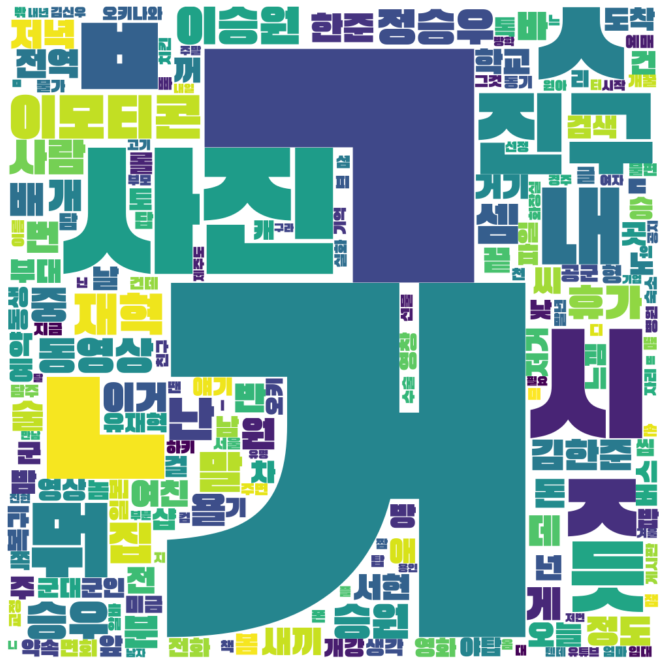

In [72]:
kakao_word_cloud(r"E:\Develop\python\NLP\Corpus\KakaoTalkChats_고아.txt", '회원님', r"E:\Develop\python\NLP\howls_nlp\Chatbot\자료\models\soy_big_space_model", r'E:\Develop\python\NLP\howls_nlp\Chatbot\자료\stop_words.txt' )

In [69]:
kakao_word_cnt(r"E:\Develop\python\NLP\Corpus\KakaoTalkChats_고아.txt", '시발', '진구')

진구는 상대방에게 시발을(를) 79번 외쳤습니다!


In [57]:
print(kakao_preprocess(r"E:\Develop\python\NLP\Corpus\KakaoTalkChats_고아.txt", '한준'))

, ' 한준 : 파토코치도 잘알려주던데', ' 한준 : 어렵누..', ' 한준 : 뭔데 ㅋㅋㅋ', ' 한준 : 승우야', ' 한준 : 사진', ' 한준 : 사진', ' 한준 : 이정도면 티모 브론즈의 왕자', ' 한준 : ㅇㅈ이냐?', ' 한준 : 개꿀빰', ' 한준 : ㅋㅋ', ' 한준 : 그냥 무조건임 거의', ' 한준 : ㅇㅇ', ' 한준 : 재밌어진듯?', ' 한준 : 맵 바뀌는거 신기함', ' 한준 : 왜', ' 한준 : 덕분에 더 먹고사는거아니것냐', ' 한준 : 아무생각없이 듣기좋은~ 하우스 음악 팟 캐 스 트! https://podcasts.apple.com/kr/podcast/we-do-coke/id1462269145', ' 한준 : ;;', ' 한준 : 아무생각없이 듣기좋은~ 하우스 음악 팟 캐 스 트! 가 있어서 소개드리러 왔습니다~', ' 한준 : 안드로이드', ' 한준 : 링크도 가져옴', ' 한준 : 닥쳐', ' 한준 : 엥 잘못', ' 한준 : 썻네', ' 한준 : 🤣', ' 한준 : 공익 혓바닥 잘못 놀리면', ' 한준 : 이제 복무기간 무제한으로 늘어난다 이거야..', ' 한준 : 그렇대', ' 한준 : ㅅㅂ ㅋㅋ', ' 한준 : 사진', ' 한준 : 승우야', ' 한준 : 너이거', ' 한준 : 필요하냐', ' 한준 : 아니 지인이 원가에 넘긴대', ' 한준 : ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 한준 : 대가리', ' 한준 : ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', ' 한준 : 그럼 노안이네', ' 한준 : 승우야', ' 한준 : 너 프로그래밍', ' 한준 : 웹도', ' 한준 : 할줄아냐', ' 한준 : 웹에서', ' 한준 : 메일 보내는거 있잖아', ' 한준 : 메일침프', ' 한준 : 같은', ' 한준 : 그런거 메일 주소 따오는거 가능?', ' 한준 : 수신자 메일주소', ' 한준 : 사진', ' 한준 : 여기서 저 send mail', ' 한준 : 인데', ' 한준 : https://www.insomniacmusicgroup.com/label/